In [1]:
import numpy as np
import os
import json
import pycpd
from matplotlib import pyplot as plt

In [2]:
def extract_annotation(data):
    for item in data:
        if 'classification' in item['properties']:
            if item['properties']['classification']['name'] == 'Region*':
                annotation_list = []
                for sublist in item['geometry']['coordinates']:
                    for sublist2 in sublist:
                        for point in sublist2:
                            annotation_list.append(point)
                return np.array(annotation_list)

In [3]:
file_path_anno = ['data/Annotation-C.json', 
                  'data/Annotation-D.json',
                  'data/Annotation-E.json',
                  'data/Annotation-F.json',
                  'data/Annotation-G.json',
                  'data/Annotation-H.json']

x_annotations = []
y_annotations = []

for path in file_path_anno:
    annotation = []
    with open(path) as f:
        data = json.load(f)
    annotation = extract_annotation(data)
    x_annotation = annotation[:,0]
    x_annotations.append(x_annotation)
    y_annotation = annotation[:,1]
    y_annotations.append(y_annotation)

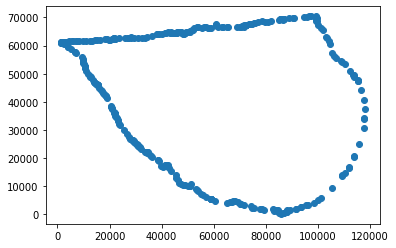

In [4]:
# Annotation C
plt.scatter(x_annotations[0],y_annotations[0])

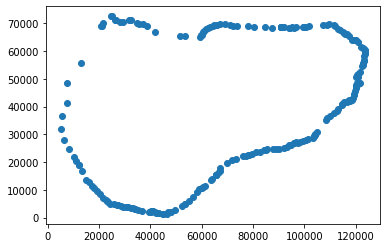

In [5]:
# Annotation D
plt.scatter(x_annotations[1],y_annotations[1])

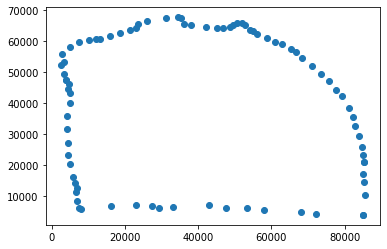

In [6]:
# Annotation E
plt.scatter(x_annotations[2],y_annotations[2])

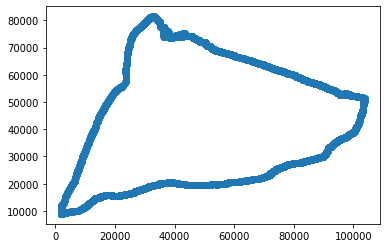

In [7]:
# Annotation F
plt.scatter(x_annotations[3],y_annotations[3])

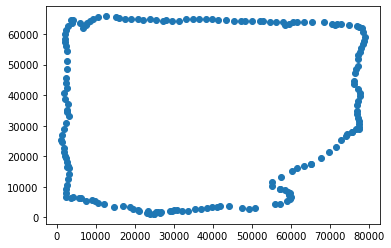

In [8]:
# Annotation G
plt.scatter(x_annotations[4],y_annotations[4])

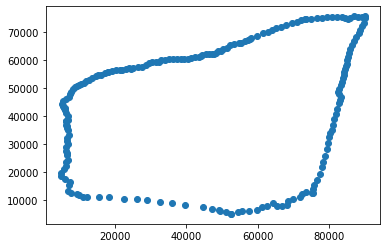

In [9]:
# Annotation H
plt.scatter(x_annotations[5],y_annotations[5])

In [10]:
file_path_cut = ['data/Schnitt-C.obj', 
                 'data/Schnitt-D.obj',
                 'data/Schnitt-E.obj',
                 'data/Schnitt-F.obj',
                 'data/Schnitt-G.obj',
                 'data/Schnitt-H.obj']
x_cuts = []
y_cuts = []

for path in file_path_cut:
    with open(path) as f:
        readlines = f.readlines()
    l = []
    for line in readlines:
        if line.startswith('l '):
            lines = line.split(' ')
            if lines[1] not in l:
                l.append(int(lines[1]))
            if lines[2] not in l:
                l.append(int(lines[2]))
                
    x_cut = []
    y_cut = []
    for index in l:
        splitted = readlines[index-1].split(' ')
        x_cut.append(float(splitted[3]))
        y_cut.append(float(splitted[1]))
    x_cuts.append(x_cut)
    y_cuts.append(y_cut)

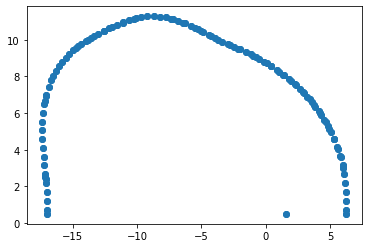

In [11]:
# Schnitt C
plt.scatter(x_cuts[0], y_cuts[0])

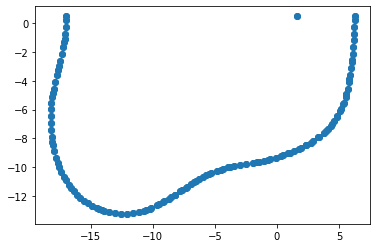

In [12]:
# Schnitt D
plt.scatter(x_cuts[1], y_cuts[1])

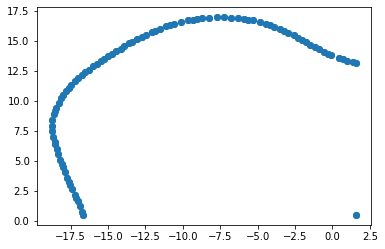

In [13]:
# Schnitt E
plt.scatter(x_cuts[2], y_cuts[2])

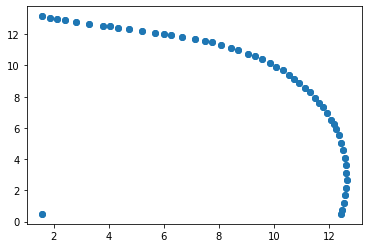

In [14]:
# Schnitt F
plt.scatter(x_cuts[3], y_cuts[3])

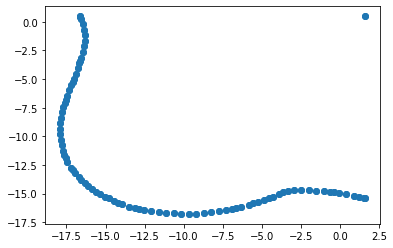

In [15]:
# Schnitt G
plt.scatter(x_cuts[4], y_cuts[4])

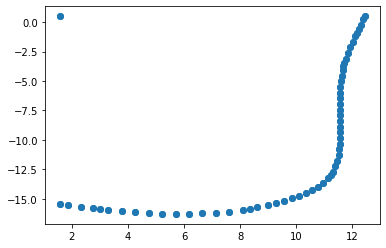

In [16]:
# Schnitt H
plt.scatter(x_cuts[5], y_cuts[5])

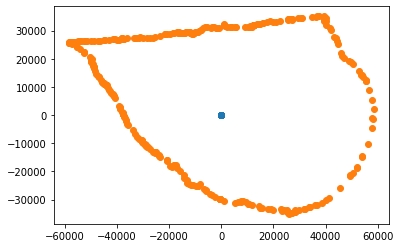

In [17]:
# Vorregestrierung

# https://medium.com/@olga_kravchenko/generalized-procrustes-analysis-with-python-numpy-c571e8e8a421
# *gemeinsamen Nullpunkt finden
x_edited_anns=[]
y_edited_anns=[]
x_edited_cuts=[]
y_edited_cuts=[]

def center_list(list):
    #extrema bestimmen
    min_list=min(list)
    max_list=max(list)
    
    #vesrschiebung errechnen
    center=(min_list+max_list)/2
    
    #Punkte verschieben
    return_list=np.array(list)-center
    
    return return_list

for i in range(0, len(x_cuts)):
    x_edited_anns.append(center_list(x_annotations[i]))
    y_edited_anns.append(center_list(y_annotations[i]))
    x_edited_cuts.append(center_list(x_cuts[i]))
    y_edited_cuts.append(center_list(y_cuts[i]))
    
plt.scatter(x_edited_cuts[0],y_edited_cuts[0])
plt.scatter(x_edited_anns[0],y_edited_anns[0])

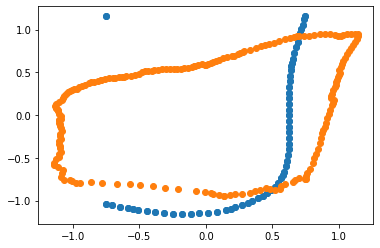

In [18]:
# *Abstände zum Nullpunkt normalisieren
def scale_lists(x_list,y_list):
    dists=np.sqrt(x_list**2 + y_list**2)
    avrg_dist=np.average(dists)
    scaled_x_list=x_list/avrg_dist
    scaled_y_list=y_list/avrg_dist
    return scaled_x_list, scaled_y_list

for i in range(0,len(x_edited_anns)):
    x_edited_anns[i],y_edited_anns[i]= scale_lists(x_edited_anns[i],y_edited_anns[i])
    
for i in range(0,len(x_edited_cuts)):
    x_edited_cuts[i],y_edited_cuts[i]= scale_lists(x_edited_cuts[i],y_edited_cuts[i])

plt.scatter(x_edited_cuts[5],y_edited_cuts[5])
plt.scatter(x_edited_anns[5],y_edited_anns[5])

<Figure size 432x288 with 0 Axes>

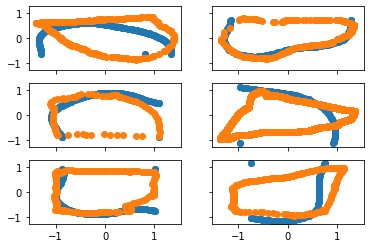

In [19]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(x_edited_anns[i],y_edited_anns[i])
    
#Ergebisse sind Falsch Rotiert und sehen hier verzerrt aus, aber die Ergenisse sollten okay sein 

In [20]:
# Flipping und Rotation für das Anpassen der Annotationen
def flip(x_list):
    new_x_list = []
    max_x=max(x_list)
    min_x=min(x_list)
    for x in x_list:
        new_x = min_x + max_x-x
        new_x_list.append(new_x)
    return new_x_list

def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
#    return list(np.moveaxis(a, axis, 0))


def rotate(x_list,y_list,radians):
    theta = np.radians(radians)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    new_coord_list =  []
    new_x_list = []
    new_y_list =  []
    arr = np.stack((x_list,y_list), axis=-1)
    for coord in arr:
        coord = coord.flatten()
        new_coord = R.dot(coord)
        new_coord_list.append(new_coord)
    new_coord_list = np.asfarray(new_coord_list)
    for coord in new_coord_list:
        x,y, = unstack(coord)
        new_x_list.append(x)
        new_y_list.append(y)
    return new_x_list, new_y_list
    
    

In [21]:
collection_x_anns =[]
collection_y_anns = []

# Datei C - vertikaler & horizontaler Flip
x_flipped_anns_c= flip(x_edited_anns[0])
y_flipped_anns_c = flip(y_edited_anns[0])
collection_x_anns.append(x_flipped_anns_c)
collection_y_anns.append(y_flipped_anns_c)

# Für Datei D, Rotation und Ausrichtung richtig. Für andere Dateien problematisch, Lösung suchen
x_flipped_anns_d= x_edited_anns[1]
y_flipped_anns_d= y_edited_anns[1]
collection_x_anns.append(x_flipped_anns_d)
collection_y_anns.append(y_flipped_anns_d)

# Datei E - 90° Rotation
x_flipped_anns_e, y_flipped_anns_e= rotate(x_edited_anns[2], y_edited_anns[2],270)
collection_x_anns.append(x_flipped_anns_e)
collection_y_anns.append(y_flipped_anns_e)

# Datei F - vertikaler Flip - 25° Rotation
x_flipped_anns_f= x_edited_anns[3]
y_flipped_anns_f = flip(y_edited_anns[3])
x_flipped_anns_f, y_flipped_anns_f = rotate(x_flipped_anns_f, y_flipped_anns_f,335)
collection_x_anns.append(x_flipped_anns_f)
collection_y_anns.append(y_flipped_anns_f)

# Datei G - horizontaler Flip
x_flipped_anns_g= flip(x_edited_anns[4])
y_flipped_anns_g = y_edited_anns[4]
collection_x_anns.append(x_flipped_anns_g)
collection_y_anns.append(y_flipped_anns_g)

# Datei H - vertikaler & horizontaler Flip
x_flipped_anns_h= flip(x_edited_anns[5])
y_flipped_anns_h = flip(y_edited_anns[5])
collection_x_anns.append(x_flipped_anns_h)
collection_y_anns.append(y_flipped_anns_h)

In [22]:
# Umstrukturieren der Punkte
Y = np.array([x_edited_anns[0].tolist(),y_edited_anns[0].tolist()])
X = np.array([x_edited_cuts[0].tolist(),y_edited_cuts[0].tolist()])

<Figure size 432x288 with 0 Axes>

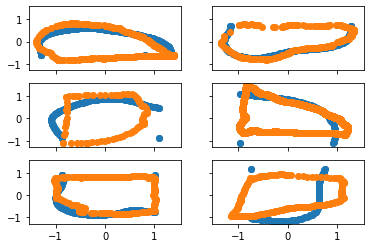

In [23]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(collection_x_anns[i],collection_y_anns[i])

In [24]:
# *Upsampling - # Interpolation für mehr Punkte

def interpolate(x1, y1, center_x,center_y,midpoints_x, midpoints_y, ct):
    if midpoints_x == None and  midpoints_y == None:
        midpoints_x = []
        midpoints_y = []

    diff_m_x = (abs(x1-center_x)/ct)
    diff_m_y = (abs(y1-center_y)/ct)
    m_x = x1
    m_y = y1
    
    for i in range(0,ct):
        if x1 > center_x:
            m_x = m_x - diff_m_x
        elif x1 < center_x:
            m_x = m_x + diff_m_x
        if y1 > center_y:
            m_y = m_y - diff_m_y
        elif y1 < center_y:
            m_y = m_y + diff_m_y
        
        midpoints_x.append(m_x)
        midpoints_y.append(m_y)

    return midpoints_x, midpoints_y


<Figure size 432x288 with 0 Axes>

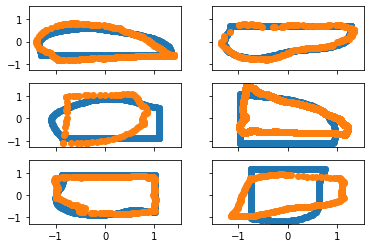

In [25]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)

for i in range(0,len(x_cuts)):

    x1 = x_edited_cuts[i][-2]
    y1 = y_edited_cuts[i][-2]#li. außen
    x2 = x_edited_cuts[i][-4]
    y2 = y_edited_cuts[i][-4]#re. außen
    c_x = x_edited_cuts[i][-1]
    c_y = y_edited_cuts[i][-1]#mitte
    

    
    #diff=len(collection_x_anns[i])-len(x_edited_cuts[i])
    #changed=False
    #if(diff%2==1):
    #    changed=True
    #    diff+=1
    midpoints_x1, midpoints_y1 = interpolate(x1, y1, c_x, c_y, None, None,int(50))
    #if(changed):
    #    diff-=1
    midpoints_x2, midpoints_y2 = interpolate(x2, y2, c_x, c_y,None, None,int(50))
    midpoints_x2 = np.array(midpoints_x2)
    midpoints_y2 = np.array(midpoints_y2)
    
    #print(len(x_edited_cuts[i]))
    #print(len(collection_x_anns[i]))
    #print(diff)
    #print(len(midpoints_x2))
    #print(len(midpoints_x1))
    #print("")
    
    x_edited_cuts[i] = np.append(x_edited_cuts[i], midpoints_x1)
    y_edited_cuts[i] = np.append(y_edited_cuts[i], midpoints_y1)
    x_edited_cuts[i] = np.append(x_edited_cuts[i], midpoints_x2)
    y_edited_cuts[i] = np.append(y_edited_cuts[i], midpoints_y2)
             

    
#plt.scatter( x_edited_cuts[0], y_edited_cuts[0])
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(collection_x_anns[i],collection_y_anns[i])

In [26]:
# Interpolation 
# https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d
# https://numpy.org/doc/stable/reference/generated/numpy.interp.html

for i in range(len(x_edited_cuts)): #geht durch alle annotationen 
    #vereinfache bennenung
    diff=len(collection_x_anns[i])-len(x_edited_cuts[i])
    xs = x_edited_cuts[i]  
    ys = y_edited_cuts[i]

    #plt.figure(figsize=(10,10))

    midpoints_x = []
    midpoints_y = []

    while (diff>0):
        for i_x in range(0,xs.shape[0]):
            idx1 = i_x
            idx2 = i_x+1
    
            if i_x == xs.shape[0]-1:
                idx2 = 0

            x1 = xs[idx1]
            x2 = xs[idx2]
            y1 = ys[idx1]
            y2 = ys[idx2]
            m_x = ((x1+x2)/2)
            m_y = ((y1+y2)/2)
            if(diff>0):
                midpoints_x.append(m_x)
                midpoints_y.append(m_y)
                diff=diff-1
    x_edited_cuts[i] = np.append(x_edited_cuts[i], midpoints_x)
    y_edited_cuts[i] = np.append(y_edited_cuts[i], midpoints_y)

    
    

In [27]:
diff=len(collection_x_anns[3])-len(x_edited_cuts[3])
print(diff)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(collection_x_anns[i],collection_y_anns[i])

0


In [28]:
from functools import partial
from pycpd import AffineRegistration
import time

iteration: 1
0.006499052047729492
iteration: 2
0.0042498111724853516
iteration: 3
0.003666480382283529
iteration: 4
0.003124833106994629
iteration: 5
0.0029000759124755858
iteration: 6
0.002749919891357422
iteration: 7
0.0026428018297467914
iteration: 8
0.0025624334812164307
iteration: 9
0.00249995125664605
iteration: 10
0.0023999452590942384
iteration: 11
0.002409176392988725
iteration: 12
0.0023749669392903647
iteration: 13
0.0023461121779221753
iteration: 14
0.0023213624954223633
iteration: 15
0.002299976348876953
iteration: 16
0.0022812187671661377
iteration: 17
0.002264681984396542
iteration: 18
0.002249969376458062
iteration: 19
0.0022368180124383223
iteration: 20
0.0022250652313232423
iteration: 21
0.00221426146371024
iteration: 22
0.002227241342717951
iteration: 23
0.0022173757138459578
iteration: 24
0.0022291441758473716
iteration: 25
0.0022400665283203126
iteration: 26
0.0022499836408174955
iteration: 27
0.002240772600527163
iteration: 28
0.0022499731608799528
iteration: 29
0

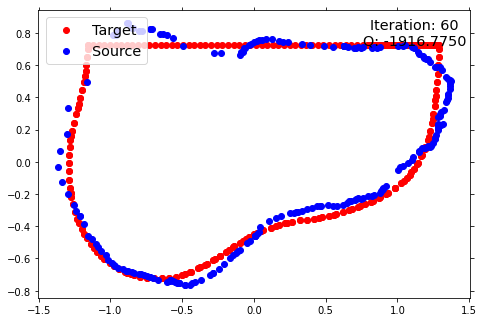

0.004874996344248454
iteration: 61
0.00483606291598961


In [29]:


start=0
end=1


def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==60):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)


# Umstrukturieren der Punkte
Y = np.array([collection_x_anns[1],collection_y_anns[1]])
X = np.array([x_edited_cuts[1].tolist(),y_edited_cuts[1].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=61)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()







iteration: 1
0.005001068115234375
iteration: 2
0.004250168800354004
iteration: 3
0.0038335323333740234
iteration: 4
0.003625035285949707
iteration: 5
0.0033999919891357423
iteration: 6
0.003333489100138346
iteration: 7
0.003214325223650251
iteration: 8
0.0032500028610229492
iteration: 9
0.003166675567626953
iteration: 10
0.0031499624252319335
iteration: 11
0.0030909234827215023
iteration: 12
0.0030834078788757324
iteration: 13
0.003038461391742413
iteration: 14
0.0030357156481061664
iteration: 15
0.0030000050862630206
iteration: 16
0.003000006079673767
iteration: 17
0.0029706534217385683
iteration: 18
0.0029722187254163954
iteration: 19
0.0029736820020173724
iteration: 20
0.003000009059906006
iteration: 21
0.003023851485479446
iteration: 22
0.0030681870200417257
iteration: 23
0.003130446309628694
iteration: 24
0.0031876166661580405
iteration: 25
0.0032600116729736327
iteration: 26
0.0033269295325646033
iteration: 27
0.003370364507039388
iteration: 28
0.00341071401323591
iteration: 29
0

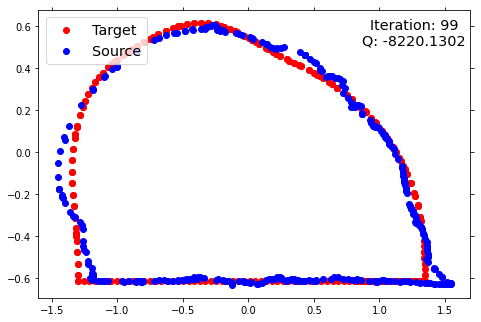

0.005931117317893289
iteration: 100
0.005926871299743652


In [30]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
    
Y = np.array([collection_x_anns[0],collection_y_anns[0]])
X = np.array([x_edited_cuts[0].tolist(),y_edited_cuts[0].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=100)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

iteration: 1
0.0010297298431396484
iteration: 2
0.0007714033126831055
iteration: 3
0.0008512338002522787
iteration: 4
0.0007629990577697754
iteration: 5
0.0008104324340820312
iteration: 6
0.0008402268091837565
iteration: 7
0.0007916518620082311
iteration: 8
0.0008176267147064209
iteration: 9
0.0008378823598225912
iteration: 10
0.0008042097091674804
iteration: 11
0.0008218938654119319
iteration: 12
0.0007951656977335612
iteration: 13
0.0007950526017409104
iteration: 14
0.0007756948471069336
iteration: 15
0.0007572968800862631
iteration: 16
0.0007724612951278687
iteration: 17
0.0007564320283777573
iteration: 18
0.0007698535919189453
iteration: 19
0.000781962746068051
iteration: 20
0.0007678627967834473
iteration: 21
0.0007552078792027064
iteration: 22
0.0007658004760742188
iteration: 23
0.0007547502932341202
iteration: 24
0.0007645686467488607
iteration: 25
0.0007542991638183594
iteration: 26
0.0007637464083158053
iteration: 27
0.0007539766806143301
iteration: 28
0.0007624966757638114
it

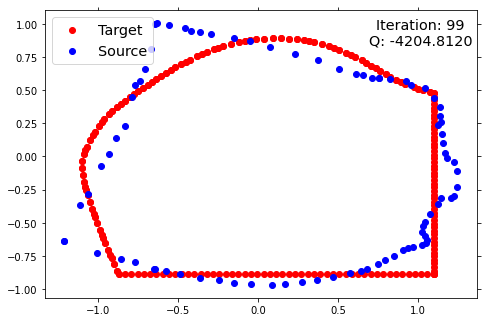

0.0021752203353727706
iteration: 100
0.0021634674072265624


In [31]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[2],collection_y_anns[2]])
X = np.array([x_edited_cuts[2].tolist(),y_edited_cuts[2].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=100)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

iteration: 1
22.9662926197052
iteration: 2
16.407896757125854
iteration: 3
15.03676438331604
iteration: 4
13.69282352924347
iteration: 5
12.886258745193482
iteration: 6
12.307798862457275
iteration: 7
11.915256125586373
iteration: 8
11.605599611997604
iteration: 9
11.41492141617669
iteration: 10
11.242029404640197
iteration: 11
11.080526612021707
iteration: 12
10.958607812722525
iteration: 13
10.844753375420204
iteration: 14
10.750163861683436
iteration: 15
10.652252928415935
iteration: 16
10.593518286943436
iteration: 17
10.512046954211067
iteration: 18
10.451738874117533
iteration: 19
10.401410629874782
iteration: 20
10.335114943981171
iteration: 21
10.28091904095241
iteration: 22
10.239581790837375
iteration: 23
10.215927787449049
iteration: 24
10.184555739164352
iteration: 25
10.151633520126342
iteration: 26
10.1269746193519
iteration: 27
10.102234716768619
iteration: 28
10.081744287695203
iteration: 29
10.063839295814777
iteration: 30
10.051027925809224
iteration: 31
10.0255109033

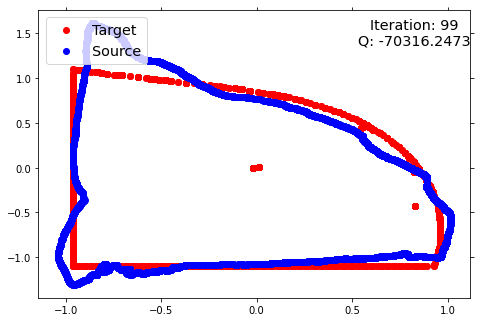

9.740393821639245
iteration: 100
9.741628031730652


In [32]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[3],collection_y_anns[3]])
X = np.array([x_edited_cuts[3].tolist(),y_edited_cuts[3].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=100)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

iteration: 1
0.010497570037841797
iteration: 2
0.005998730659484863
iteration: 3
0.004332542419433594
iteration: 4
0.003499746322631836
iteration: 5
0.003099489212036133
iteration: 6
0.0027498801549275718
iteration: 7
0.00249964850289481
iteration: 8
0.002312213182449341
iteration: 9
0.0021664036644829642
iteration: 10
0.002049756050109863
iteration: 11
0.0019088658419522371
iteration: 12
0.0018747647603352864
iteration: 13
0.0017690291771521936
iteration: 14
0.0017141614641462053
iteration: 15
0.0016666094462076822
iteration: 16
0.0016248822212219238
iteration: 17
0.0016174877391142003
iteration: 18
0.0015553898281521266
iteration: 19
0.0015261926149067126
iteration: 20
0.001524972915649414
iteration: 21
0.001476151602608817
iteration: 22
0.001454418355768377
iteration: 23
0.0014346786167310631
iteration: 24
0.0014165937900543213
iteration: 25
0.001400012969970703
iteration: 26
0.001384570048405574
iteration: 27
0.0013702710469563801
iteration: 28
0.0013570530073983328
iteration: 29
0

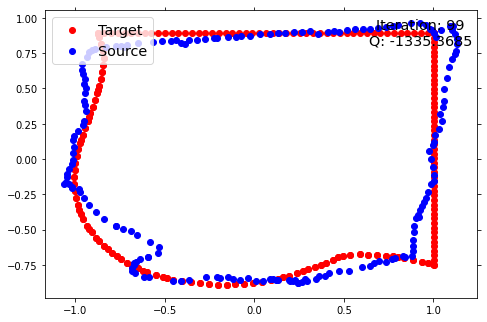

0.002954516747985223
iteration: 100
0.0029349827766418455


In [36]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[4],collection_y_anns[4]])
X = np.array([x_edited_cuts[4].tolist(),y_edited_cuts[4].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=100)
reg.register(callback)
plt.show()

iteration: 1
0.17999935150146484
iteration: 2
0.09075033664703369
iteration: 3
0.06083377202351888
iteration: 4
0.046000123023986816
iteration: 5
0.037000083923339845
iteration: 6
0.03100009759267171
iteration: 7
0.02671429089137486
iteration: 8
0.023500025272369385
iteration: 9
0.02105556594000922
iteration: 10
0.019050049781799316
iteration: 11
0.017409129576249557
iteration: 12
0.016000032424926758
iteration: 13
0.014846159861637996
iteration: 14
0.013857160295758928
iteration: 15
0.013000043233235677
iteration: 16
0.012250036001205444
iteration: 17
0.011588292963364544
iteration: 18
0.011000023947821723
iteration: 19
0.010473715631585372
iteration: 20
0.010000038146972656
iteration: 21
0.009571461450485956
iteration: 22
0.009181846271861683
iteration: 23
0.00882610030796217
iteration: 24
0.008500019709269205
iteration: 25
0.00820002555847168
iteration: 26
0.007923071201031025
iteration: 27
0.007666684963085034
iteration: 28
0.0074285779680524555
iteration: 29
0.007206941473072973
i

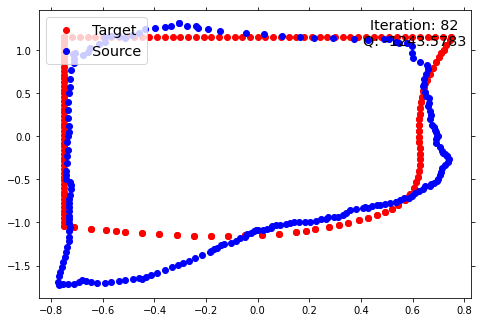

0.005249988741990997
iteration: 83
0.005204826952463173


In [34]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==82):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[5],collection_y_anns[5]])
X = np.array([x_edited_cuts[5].tolist(),y_edited_cuts[5].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=83)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

iteration: 1


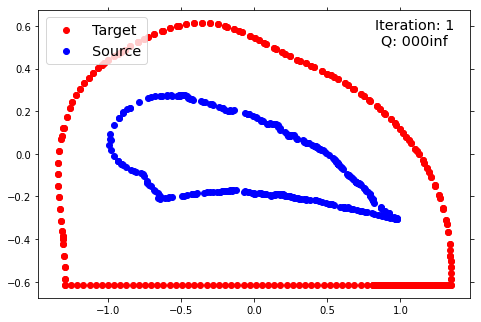

0.2140028476715088
iteration: 2


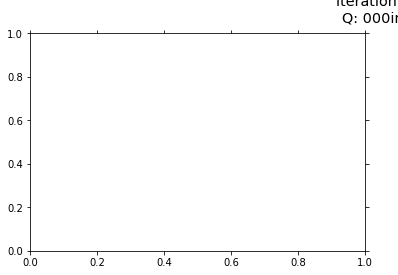

0.16899967193603516
iteration: 3


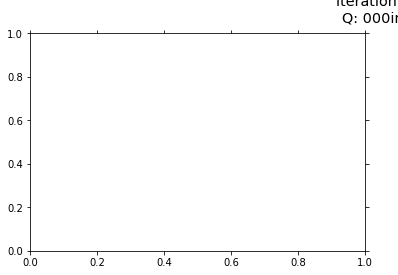

0.15400091807047525
iteration: 4


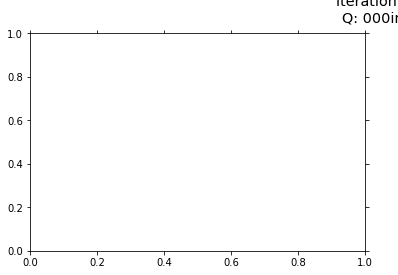

0.1465001106262207
iteration: 5


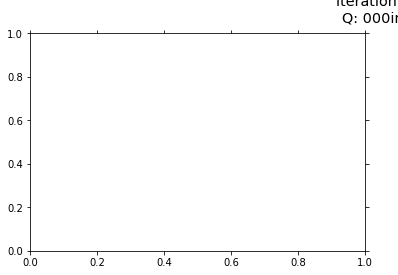

0.14200005531311036
iteration: 6


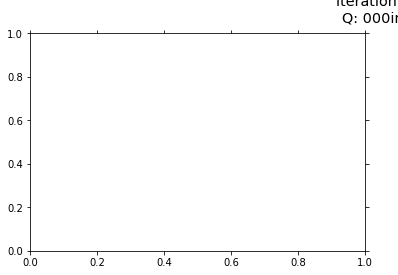

0.139000137646993
iteration: 7


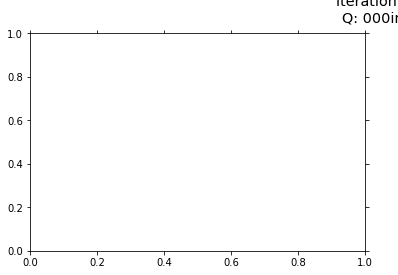

0.1368569987160819
iteration: 8


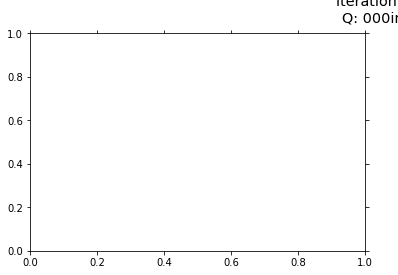

0.1352503001689911
iteration: 9


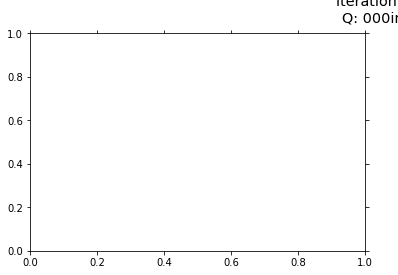

0.1443332036336263
iteration: 10


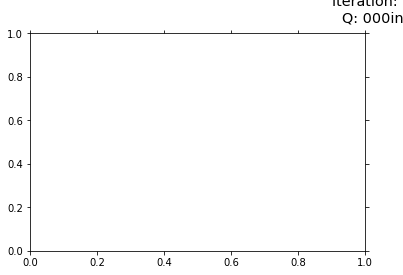

0.14229993820190429
iteration: 11


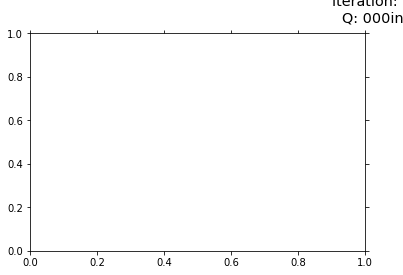

0.14063663916154343
iteration: 12


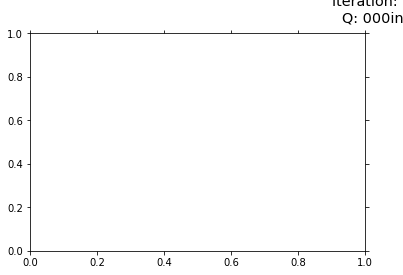

0.13925017913182577
iteration: 13


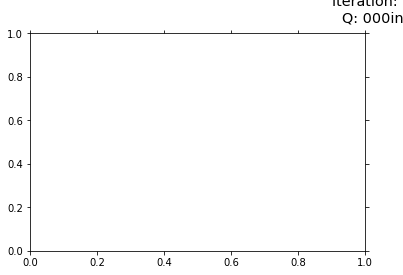

0.1380770206451416
iteration: 14


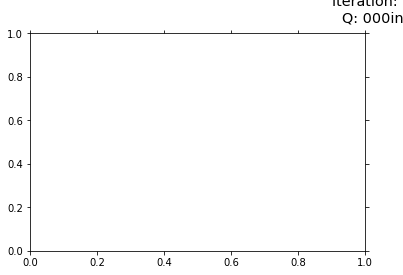

0.13707147325788224
iteration: 15


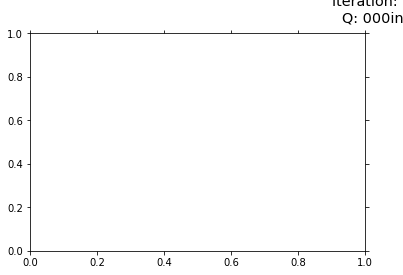

0.1362024466196696
iteration: 16


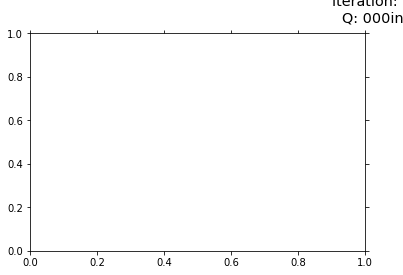

0.13543978333473206
iteration: 17


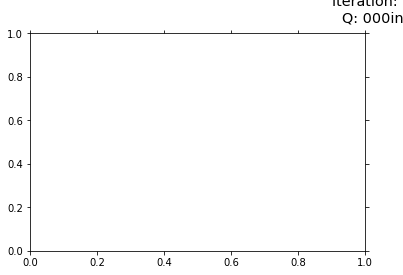

0.1347668591667624
iteration: 18


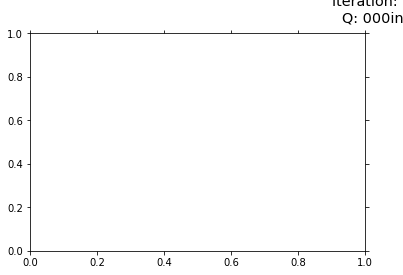

0.1341689560148451
iteration: 1


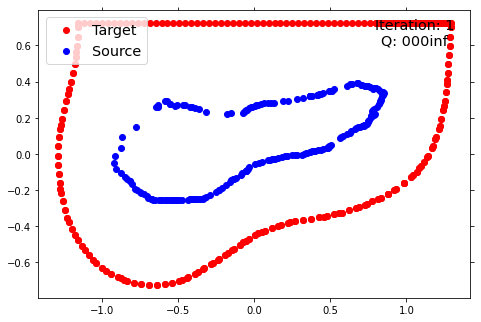

0.1439976692199707
iteration: 2


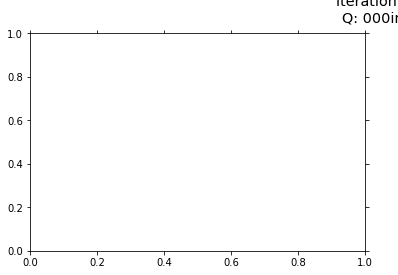

0.15724873542785645
iteration: 3


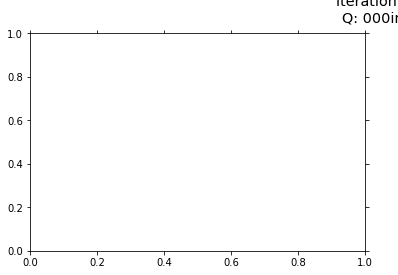

0.14616592725118002
iteration: 4


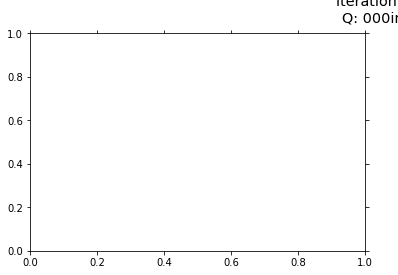

0.14062434434890747
iteration: 5


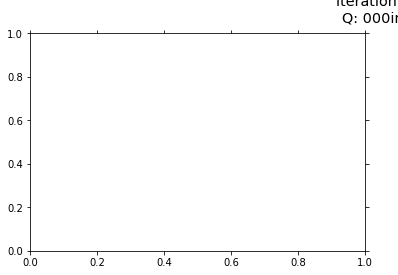

0.1372994899749756
iteration: 6


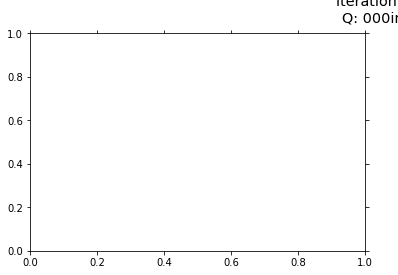

0.1350830396016439
iteration: 7


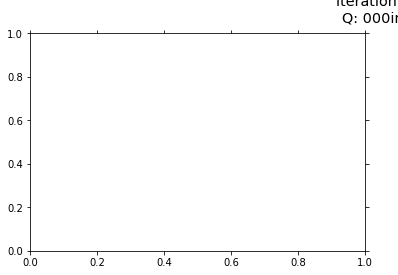

0.1334998607635498
iteration: 8


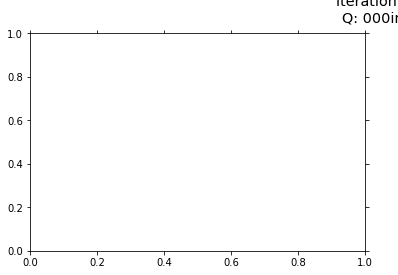

0.1323123276233673
iteration: 9


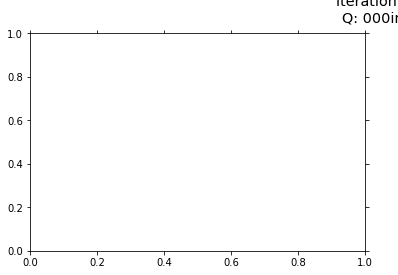

0.13138863775465223
iteration: 10


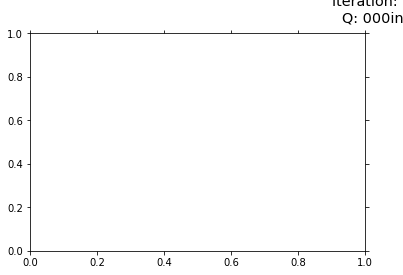

0.13064975738525392
iteration: 11


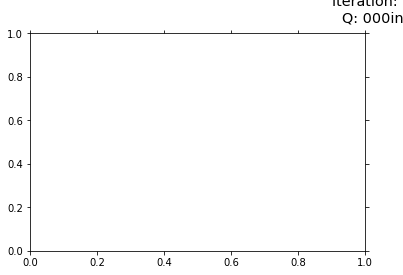

0.130045240575617
iteration: 12


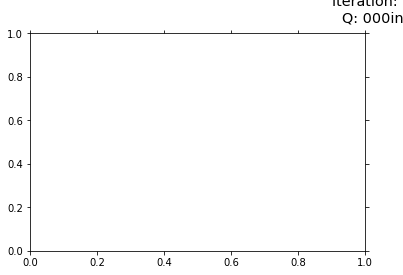

0.12954147656758627
iteration: 13


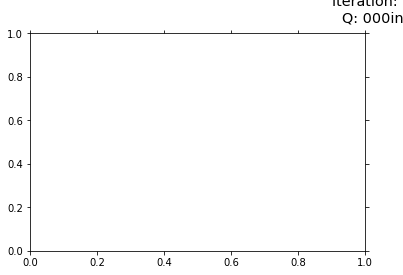

0.1326921169574444
iteration: 14


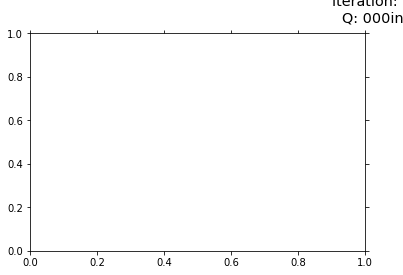

0.1353926658630371
iteration: 15


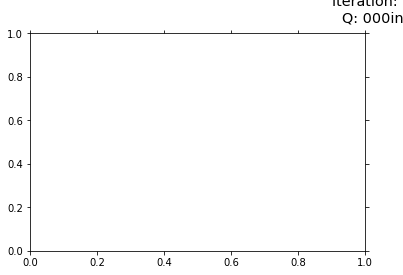

0.13463314374287924
iteration: 16


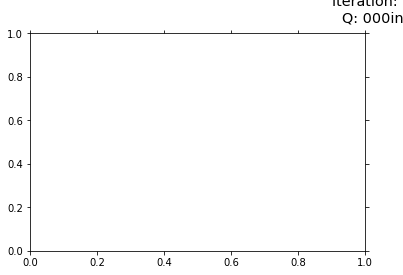

0.13396860659122467
iteration: 1


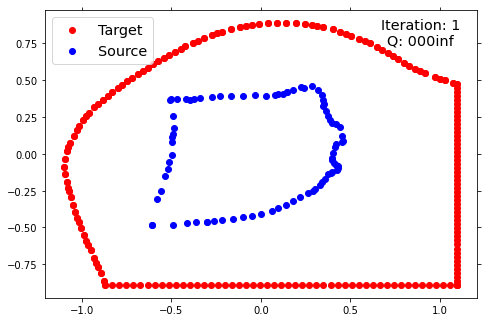

0.1444990634918213
iteration: 2


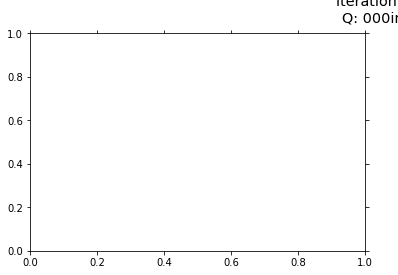

0.13424968719482422
iteration: 3


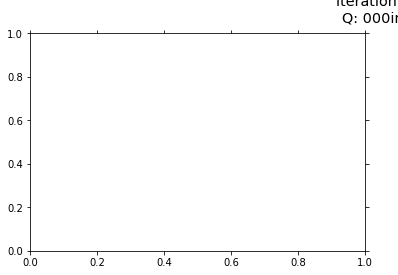

0.12566733360290527
iteration: 4


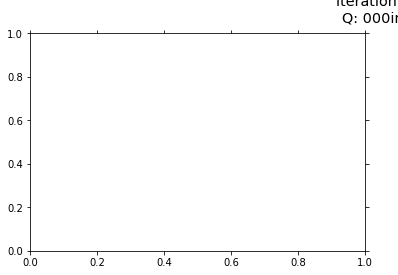

0.12137538194656372
iteration: 5


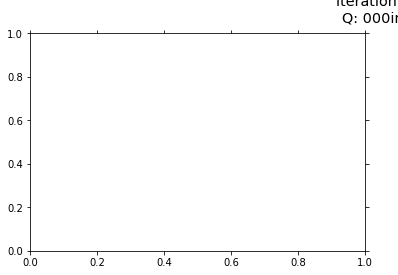

0.12189955711364746
iteration: 6


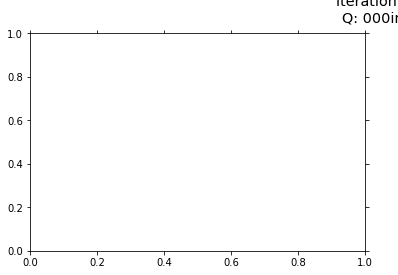

0.11966629823048909
iteration: 7


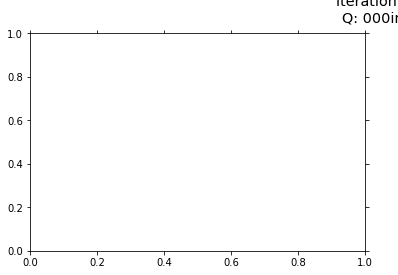

0.11807114737374443
iteration: 8


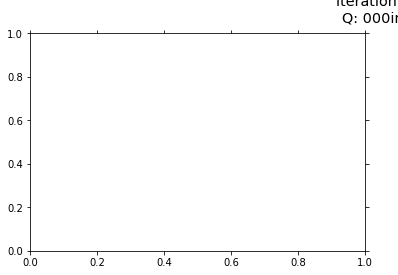

0.12462472915649414
iteration: 9


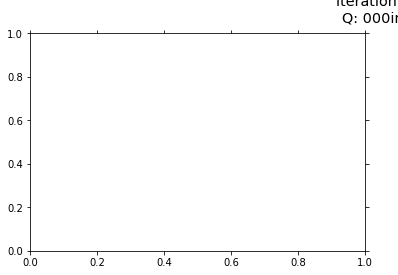

0.1228330930074056
iteration: 10


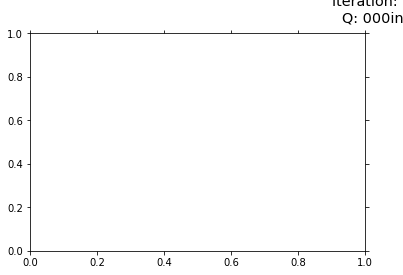

0.12140002250671386
iteration: 11


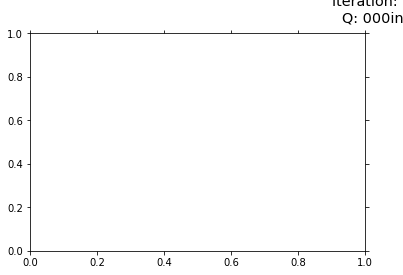

0.12022703344171698
iteration: 12


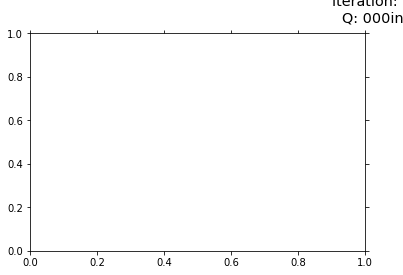

0.12054145336151123
iteration: 13


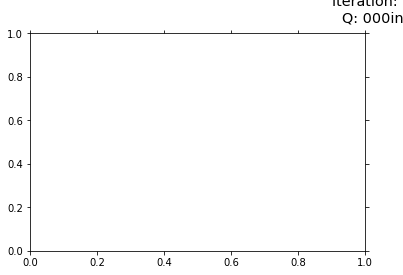

0.12080750098595253
iteration: 14


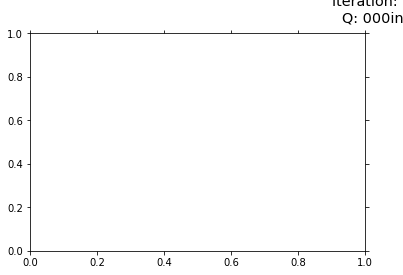

0.12103554180690221
iteration: 15


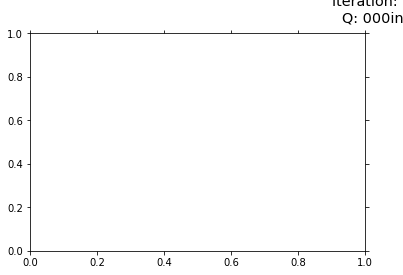

0.12123314539591472
iteration: 16


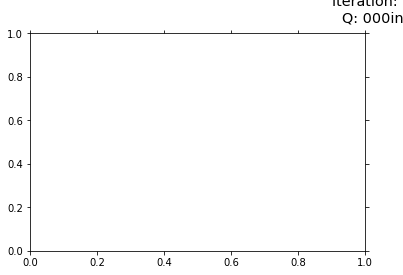

0.12140607833862305
iteration: 17


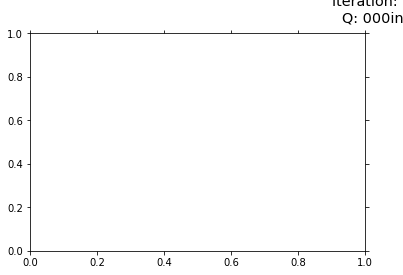

0.12155868025387034
iteration: 1


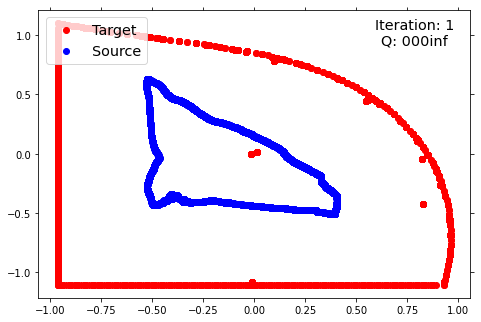

111.32170867919922


KeyboardInterrupt: 

In [35]:
from pycpd import DeformableRegistration

def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    plt.cla()
    ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
    ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
    plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
        iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
    ax.legend(loc='upper left', fontsize='x-large')
    plt.draw()
    plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
for i in range(len(x_edited_cuts)):
    Y = np.array([collection_x_anns[i],collection_y_anns[i]])
    X = np.array([x_edited_cuts[i].tolist(),y_edited_cuts[i].tolist()])
    X=np.swapaxes(X, 0, 1)
    Y=np.swapaxes(Y, 0, 1)


    xLabels = ["X1", "X2", "X3"]
    yLabels = ["Y1", "Y2", "Y3"]

    fig = plt.figure()
    fig.add_axes([0, 0, 1, 1])
    callback = partial(visualize, ax=fig.axes[0])


    dictio=({'X': X, 'Y': Y})
    start=time.time()
    reg = DeformableRegistration(**dictio)

    reg.register(callback)
    plt.show()